In [31]:
##read in bunch of things I might use
import sys
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import *
import warnings
import scipy
from scipy.interpolate import interp1d
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.decomposition import PCA
# from sklearn.impute import SimpleImputer
# from scipy.spatial.distance import pdist
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [32]:
##Import machiene learning packages you might need
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler

In [33]:
##read in the df
df=pd.read_csv('batch_soil_csv - PCA.csv',sep=',', delimiter=None, header='infer', engine='python')
df.head(5)

,Species,Site,Organic_Matter,pH,Phosphorus,Potassium,Calcium,Magnesium,Sulfur,Sodium,Zinc,Manganese,Iron,Copper,Boron
0,exaltata,RRL,14.2,6.2,7,138,788,133,6,17,2.4,97,62,1.6,0.3
1,exaltata,RRL,13.8,5.9,8,132,935,146,8,19,3.1,77,94,2.8,0.2
2,exaltata,RRL,12.4,5.4,7,184,646,102,11,17,1.9,74,75,2.7,0.2
3,exaltata,RRL,14.7,6.0,9,172,824,133,7,16,2.6,87,76,1.8,0.2
4,exaltata,RRL,12.6,6.2,7,134,1028,151,8,19,2.7,94,90,1.9,0.3


In [34]:
df[df['Site'] == 'RRL'].head()

,Species,Site,Organic_Matter,pH,Phosphorus,Potassium,Calcium,Magnesium,Sulfur,Sodium,Zinc,Manganese,Iron,Copper,Boron
0,exaltata,RRL,14.2,6.2,7,138,788,133,6,17,2.4,97,62,1.6,0.3
1,exaltata,RRL,13.8,5.9,8,132,935,146,8,19,3.1,77,94,2.8,0.2
2,exaltata,RRL,12.4,5.4,7,184,646,102,11,17,1.9,74,75,2.7,0.2
3,exaltata,RRL,14.7,6.0,9,172,824,133,7,16,2.6,87,76,1.8,0.2
4,exaltata,RRL,12.6,6.2,7,134,1028,151,8,19,2.7,94,90,1.9,0.3


In [35]:
##get response
##look at your data to make sure your 'P' only contains predictors

R=df.iloc[:,0:2]

#get predictors
P=df.iloc[:,2:]
P.head(2)

,Organic_Matter,pH,Phosphorus,Potassium,Calcium,Magnesium,Sulfur,Sodium,Zinc,Manganese,Iron,Copper,Boron
0,14.2,6.2,7,138,788,133,6,17,2.4,97,62,1.6,0.3
1,13.8,5.9,8,132,935,146,8,19,3.1,77,94,2.8,0.2


In [36]:
R.head()

,Species,Site
0,exaltata,RRL
1,exaltata,RRL
2,exaltata,RRL
3,exaltata,RRL
4,exaltata,RRL


In [37]:
R['Site'].unique()

array(['RRL', 'CMB', 'SLG', 'LFS', 'PTW', 'SGC', 'RF', 'FRW', 'MMP',
       'RGT', 'LM', 'MKP', 'PNR'], dtype=object)

In [38]:
##standardize P

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the DataFrame and transform the data
df_std = scaler.fit_transform(P)

# Convert the standardized data back to a DataFrame
P_std = pd.DataFrame(df_std, columns=P.columns)

P_std.head()


,Organic_Matter,pH,Phosphorus,Potassium,Calcium,Magnesium,Sulfur,Sodium,Zinc,Manganese,Iron,Copper,Boron
0,-0.311650,0.355830,-1.005963,-0.023510,-1.043513,-0.658199,-1.240554,0.319866,-0.854907,0.788240,-1.209892,0.179666,-0.718545
1,-0.350849,-0.066038,-0.986101,-0.133086,-0.866862,-0.546312,-0.939360,1.009101,-0.757007,0.330960,-0.162717,1.185427,-0.995851
2,-0.488049,-0.769152,-1.005963,0.816577,-1.214155,-0.925006,-0.487568,0.319866,-0.924836,0.262368,-0.784477,1.101614,-0.995851
3,-0.262650,0.074584,-0.966239,0.597424,-1.000252,-0.658199,-1.089957,-0.024752,-0.826936,0.559600,-0.751753,0.347293,-0.995851
4,-0.468449,0.355830,-1.005963,-0.096561,-0.755103,-0.503278,-0.939360,1.009101,-0.812950,0.719648,-0.293614,0.431107,-0.718545


In [39]:
##create a column in df where response is changed to binary

R['S']=R['Species']

R['BSite'] = R['Site']

#replace 'exaltata' with 0 and 'syriaca' with 1
R['S'].replace({'exaltata': 0, 'syriaca': 1}, inplace=True)



In [40]:
R.head()

,Species,Site,S,BSite
0,exaltata,RRL,0,RRL
1,exaltata,RRL,0,RRL
2,exaltata,RRL,0,RRL
3,exaltata,RRL,0,RRL
4,exaltata,RRL,0,RRL


In [41]:

#R['BSite'].replace({'RRL': 0, 'FRW': 1}, inplace=True)

##expand the site to either "0" for wintergreen or "1" for cole Mtn and "2" for Blacksburg
R['BSite'].replace({'CMB': 1, 'FRW': 1, 'LFS': 1, 'LM': 0, 'MMP': 1, 'MKP': 2, 
                    'PNR': 2, 'PTW': 0, 'RF': 2, 'RGT': 0, 'RRL': 0, 'SGC': 0, 'SLG': 1}, inplace=True)



R.tail(10)

,Species,Site,S,BSite
171,syriaca,RF,1,2
172,syriaca,PNR,1,2
173,syriaca,PNR,1,2
174,syriaca,PNR,1,2
175,syriaca,PNR,1,2
176,syriaca,PNR,1,2
177,syriaca,RF,1,2
178,syriaca,RF,1,2
179,syriaca,RF,1,2
180,syriaca,RF,1,2


In [42]:
##do a quick PCA to look at data structure

##first, lets do a PCA

###PCA

from sklearn.decomposition import PCA

# assuming your dataframe is called 'df'
# and you want to extract 2 principal components
pca = PCA(n_components=4)
pca.fit(P_std)

# transform the original data to the new coordinate system
Pt = pca.transform(P_std)
Ppca = pd.DataFrame(Pt)

##join df
PC = Ppca.join(R, how='inner')
PC.head(2)

,0,1,2,3,Species,Site,S,BSite
0,-0.070936,-2.243460,-0.716461,0.546173,exaltata,RRL,0,0
1,0.066965,-2.109227,0.169763,1.207608,exaltata,RRL,0,0


In [43]:
PC.head()

,0,1,2,3,Species,Site,S,BSite
0,-0.070936,-2.243460,-0.716461,0.546173,exaltata,RRL,0,0
1,0.066965,-2.109227,0.169763,1.207608,exaltata,RRL,0,0
2,-0.716933,-2.222226,0.556831,1.032364,exaltata,RRL,0,0
3,-0.358141,-2.160042,0.006450,0.443640,exaltata,RRL,0,0
4,0.306213,-2.003942,-0.293937,1.107523,exaltata,RRL,0,0


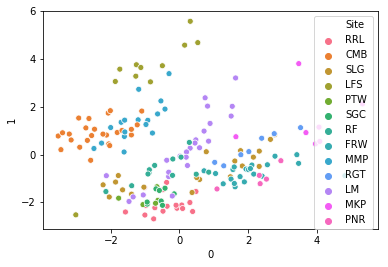

In [44]:
##expand the site to either 
#"0" for wintergreen or 
#"1" for cole Mtn and 
#"2" for Blacksburg


sns.scatterplot(data=PC, x=0, y=1, hue='Site')

In [45]:
###Random Forest
# Define your predictors (X) and target variable (y)
X = P_std
y = R['BSite']

In [152]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Create a random forest classifier with 1000 trees
# we are starting with 1000 trees, but we might want to use out-of-bag error to determine the number of trees.
rfc = RandomForestClassifier(n_estimators=500)

# Fit the model on the training data
rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500)

In [153]:
# Predict the target variable on the testing data
y_pred = rfc.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)
counts = R['S'].value_counts()
print("Baseline Accuracy:", max(counts)/len(df))

Accuracy: 0.9375
Baseline Accuracy: 0.7292817679558011


In [154]:
# Evaluate the model on the test set
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1-score: {:.3f}'.format(f1))

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [155]:
##generate an ROC curve
# Predict the probabilities of the target variable on the testing data
y_prob = rfc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve) score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

ValueError: multiclass format is not supported

In [83]:
# Generate a confusion matrix for the model
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

#top left -- true postive predictions
#top right -- false positive predictions 
#bottom left -- false negative predictions 
#bottom right -- true negative predictions 

print(cm)

[[12  5]
 [ 0 47]]


In [89]:
#y_pred
#list(y_test)

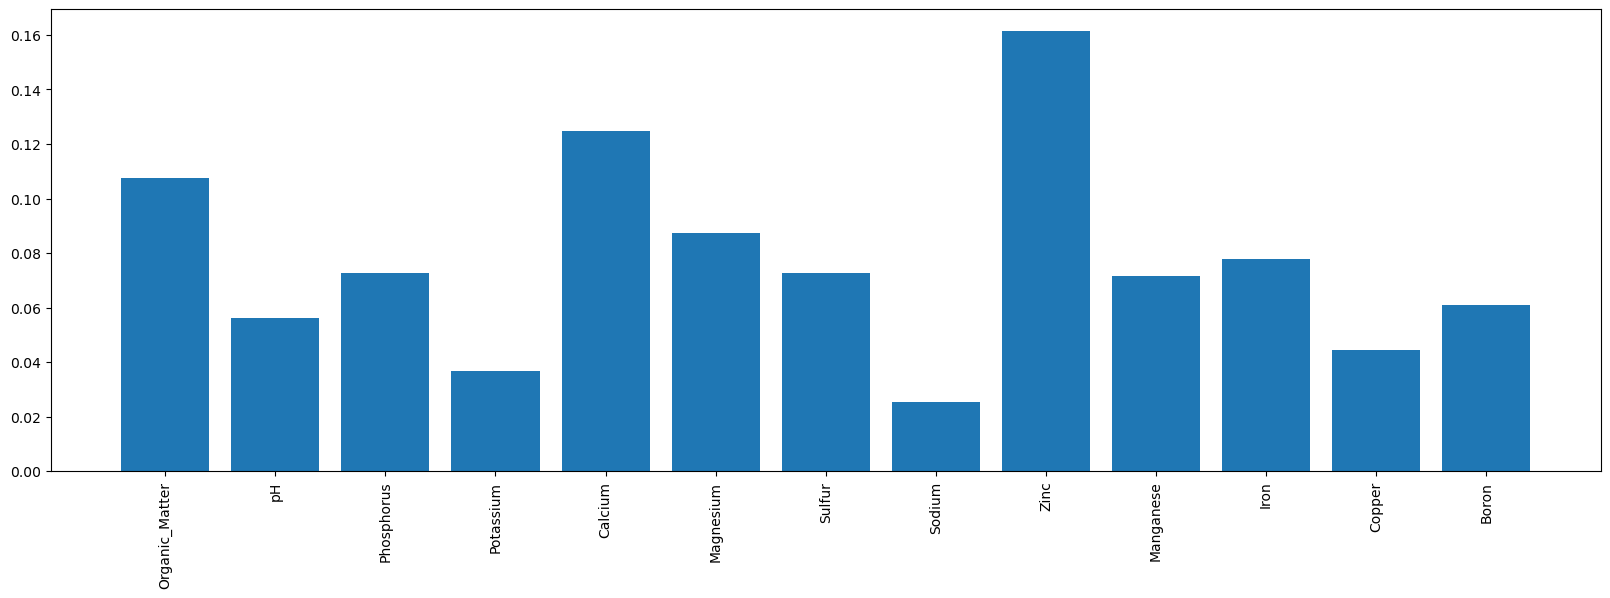

In [90]:
import matplotlib.pyplot as plt

# Determine feature importances and print them
importances = rfc.feature_importances_
#print(importances)

# Plot feature importances
plt.figure(figsize=(20, 6))
plt.bar(X.columns, importances)
plt.xticks(rotation=90)
#plt.gca().set_xticklabels([])  # remove x-axis labels
plt.show()

In [ ]:
##now that you know OM, Calc, Zinc are important. GLMM
##logistic reg. 


In [64]:
df.groupby(['Species']).mean()

,Organic_Matter,pH,Phosphorus,Potassium,Calcium,Magnesium,Sulfur,Sodium,Zinc,Manganese,Iron,Copper,Boron
Species,,,,,,,,,,,,,
exaltata,22.169388,5.555102,42.408163,127.530612,1179.693878,144.653061,15.55102,16.102041,9.500000,73.877551,97.571429,1.391837,0.373469
syriaca,15.602273,6.092424,63.303030,143.651515,1833.303030,233.537879,13.75000,16.060606,8.146212,58.310606,99.492424,1.383333,0.628030


In [68]:
df.groupby(['Species']).sem()

,Organic_Matter,pH,Phosphorus,Potassium,Calcium,Magnesium,Sulfur,Sodium,Zinc,Manganese,Iron,Copper,Boron
Species,,,,,,,,,,,,,
exaltata,1.516637,0.063759,5.203260,5.591471,122.019881,9.642220,1.189903,0.233731,1.602512,5.353382,5.485215,0.144509,0.038881
syriaca,0.829402,0.064371,4.684765,5.156929,65.881177,10.598733,0.512099,0.284083,0.426673,3.952736,2.382115,0.109819,0.031963
